# Import lib



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Files

In [32]:
df_movies = pd.read_csv(r"D:\Doc\Project\hackton\movies.csv")
df_ratings = pd.read_csv(r"D:\Doc\Project\hackton\ratings.csv")
df_tag = pd.read_csv(r"D:\Doc\Project\hackton\tags.csv")
df_links = pd.read_csv(r"D:\Doc\Project\hackton\links.csv")

In [33]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [34]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [35]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [36]:
df_tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Download the data from the above link. How many ".csv" files are available in the dataset?

### Ans : 4

## What is the shape of "movies.csv"?


In [37]:
df_movies.shape

(9742, 3)

#### Ans: (9742, 3)

## What is the shape of "ratings.csv"?


In [38]:
df_ratings.shape

(100836, 4)

#### Ans: (100836,4)

## How many unique "userId" are available in "ratings.csv"?

In [39]:
unique_users = df_ratings['userId'].nunique()
unique_users

610

#### Ans: 610

In [40]:
df_merge_mr = df_movies.merge(df_ratings, how='inner', on='movieId')

In [41]:
df_merge_mr

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


### Which movie has recieved maximum number of user ratings?

In [42]:
max_rated_movie = df_merge_mr.groupby('title')['rating'].count().idxmax()
max_rated_movie

'Forrest Gump (1994)'

#### Ans: 'Forrest Gump (1994)'

### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [43]:
df_merge_mt = df_movies.merge(df_tag, how='inner', on='movieId')
df_merge_mt

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [44]:

df_merge_mt = df_movies.merge(df_tag, how='inner', on='movieId')
matrix_tags = df_merge_mt[df_merge_mt['title'] == 'Matrix, The (1999)']['tag']
correct_tags_matrix = matrix_tags.unique()

print(correct_tags_matrix)


['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


#### Ans: 'alternate universe',philosophy','post apocalyptic'
 

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [45]:
average_rating_terminator = df_ratings[df_ratings['movieId'].isin(df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'])]['rating'].mean()
average_rating_terminator

3.970982142857143

#### Ans: 3.970982142857143

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

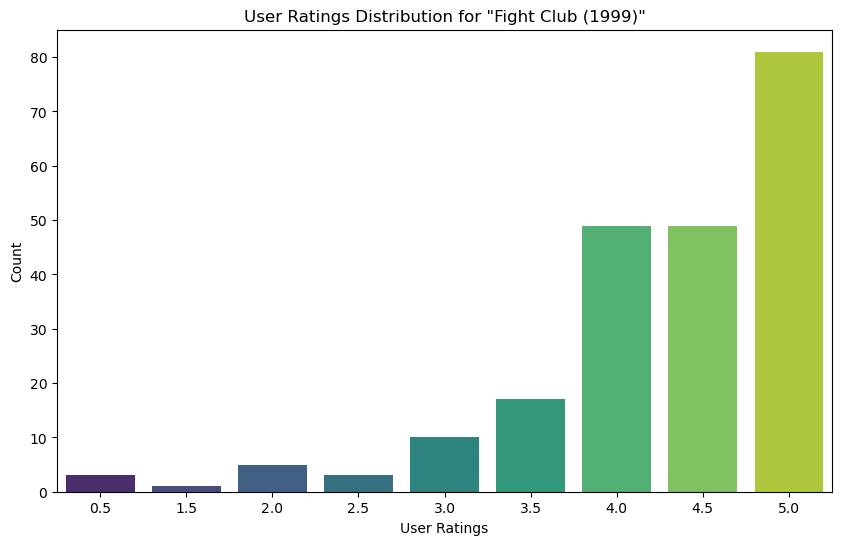

In [46]:

fight_club_ratings = df_ratings[df_ratings['movieId'].isin(df_movies[df_movies['title'] == 'Fight Club (1999)']['movieId'])]['rating']

plt.figure(figsize=(10, 6))
sns.countplot(x=fight_club_ratings, palette='viridis')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Count')
plt.show() 

#### Ans: Left Skewed Distribution

In [47]:
ratings_grouped = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

ratings_grouped

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [48]:
df_gp_me =df_movies.merge(ratings_grouped, how='inner' ,on ='movieId')
df_gp_me

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [49]:
popular_movies = df_gp_me[df_gp_me['count'] > 50]

In [50]:
popular_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


### Which movie is the most popular based on  average user ratings?


In [51]:
most_popular_movie = popular_movies[popular_movies['mean'] == popular_movies['mean'].max()]
most_popular_movie_title = most_popular_movie['title'].values[0]
most_popular_movie_title


'Shawshank Redemption, The (1994)'

#### Ans: 'Shawshank Redemption, The (1994)'

### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [52]:
top5_popular_movies = popular_movies.nlargest(5, 'count')['title']
top5_popular_movies


314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object

#### Ans: Pulp Fiction (1994) ,Bad Boys (1995) ,Matrix, The (1999)

### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [53]:
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi', case=False)]
sci_fi_movies


,movieId,title,genres,count,mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [54]:
sci_fi_movies_sorted = sci_fi_movies.sort_values(by='count', ascending=False)
sci_fi_movies_sorted


,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


#### Ans: the third most popular is Jurassic Park (1993)

# 12.Mention the movieId of the movie which has the highest IMDB rating.


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt%7Bnew_id%7D/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdbrating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

scrap['imdbId1'] = scrap.imdbId.apply(scrapper)